# About Classification

This chapter introduces essential concepts for applying machine learning to **classification problems**:

- **decision boundary**
- **train-test-split**
- **cross-validation**
- **classifier quality metrics**



## Classification Tasks



We speak of **classification** if the model outputs a _categorical_ variable, i.e. assigns labels to data points that divide them into groups. The machine learning algorithm often performs this task by creating and optimizing a **decision boundary** in the feature space that separates classes. 

![](https://upload.wikimedia.org/wikipedia/commons/1/13/Main-qimg-48d5bd214e53d440fa32fc9e5300c894.png)
**classification**
_Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Main-qimg-48d5bd214e53d440fa32fc9e5300c894.png)_


## ML Classification Algorithms

A machine learning classifier outputs a statistical model that separates datapoints into classes. The model is learned from a set of labelled examples, the training data. The following is a demonstration of various classifiers on a test dataset, including a visualization of their output and decision boundaries. Some of them also output a probability for each of the classes, so decision areas are shaded accordingly.

/Users/cls/miniforge3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cls/miniforge3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cls/miniforge3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


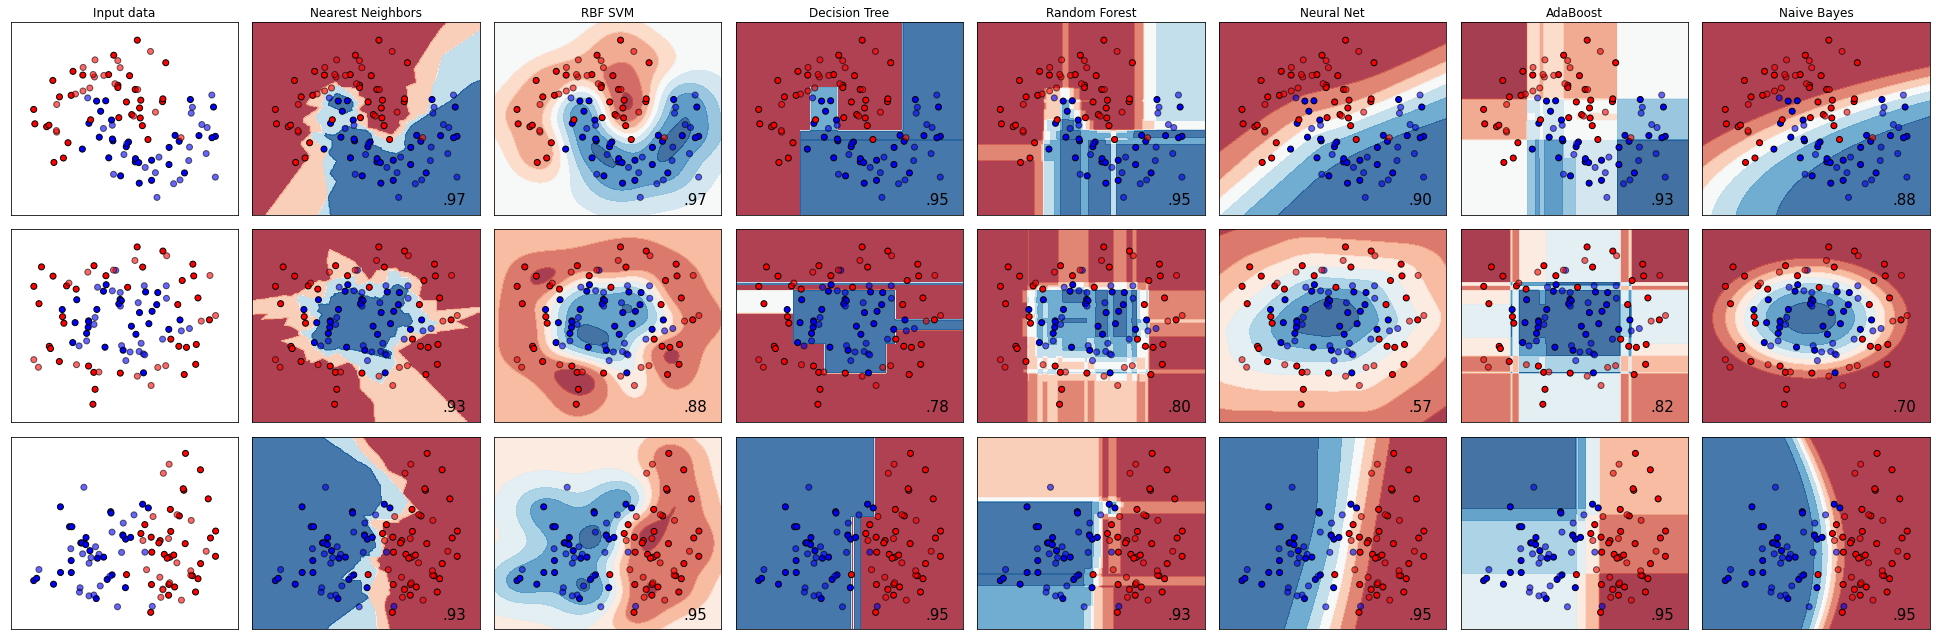

In [1]:
import classifier_gallery
classifier_gallery.show()

Here are a few examples of ML algorithms used for classification:

- **decision tree**
- **random forest**
- **gradient boosted trees**
- **support vector machine**
- **k-nearest neighbors**
- **artificial neural networks**
- **logistic regression** (despite the name, a classifier)

A large variety of algorithmic techniques can be used for such algorithms. Let's look at a relatively simple one: A **decision tree**. Branches of the tree from the root . (However, in computer science, trees grow downward).

A machine learning algorithm based on decision trees will _learn_ to build a good decision tree for the training data it is provided with. When given a new, unseen data item, it follows the tree to decide the class of the item. More advanced algorithms (random forest, gradient boosted trees..) work with several different trees to improve predictions.

![](https://upload.wikimedia.org/wikipedia/en/4/4f/GEP_decision_tree_with_numeric_and_nominal_attributes.png) 

_This decision tree will help you decide whether to plan an outdoor activity for tomorrow according to the weather forecast._

Source: [Wikipedia](https://upload.wikimedia.org/wikipedia/en/4/4f/GEP_decision_tree_with_numeric_and_nominal_attributes.png)

## Evaluating Classifiers

Given the many options of building a model for classification with ML (different algorithms, parameters, features to input...) - which one is the best? Proper evaluation is often the key to success in machine learning. Here we will introduce some concepts for achieving and measuring success in machine learning that every  practicioner should know.


> *The first principle is that you must not fool yourself and you are the easiest person to fool.* -- Richard Feynman, physicist

### Classifier Quality Metrics

Clearly a good classifier, given $T$ items with $P$ belonging to the class of interest and $N$ not, should produce many **true positives (TP)** and **true negatives (TN)** as well as few **false positives (FP)** and **false negatives (FN)**. 

A table that displays these numbers is called a **confusion matrix**. A good classifier has high values on the diagonal and low values anywhere else.

In [2]:
import pandas
pandas.DataFrame([["TN", "FP"], ["FN", "TP"]], columns=["predicted: no", "predicted: yes"], index=["actual: no", "actual: yes"])

,predicted: no,predicted: yes
actual: no,TN,FP
actual: yes,FN,TP


This leads us directly to the simplest quality metric - **accuracy**: What portion of the data items was correctly classified?

$$ACC = \frac{TP + TN}{T}$$

Different combinations of true/false positives/negatives lead to other quality metrics. Among the most frequently used are **precision, recall and F1**.

$$PREC = \frac{TP}{TP + FP}$$

$$REC = \frac{TP}{P}$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/264px-Precisionrecall.svg.png) Source: [Wikipedia](https://commons.wikimedia.org/wiki/File:Precisionrecall.svg)

![](graphics/third-party/classifier-metrics.png)
Source: [Wikipedia](https://en.m.wikipedia.org/wiki/Precision_and_recall)

Think about precision and recall with the following picture: You have targets to hit with a number of darts. If you aim carefully, throw just a few darts and every dart hits the target, you achieve perfect precision. If you throw lots and lots of darts, you will eventually hit every target at least once - that's perfect recall. But clearly you want both precision and recall at the same time for good performance. This is why we need to combine them into a single measure: the **F1 score**. Mathematically, it is harmonic mean of precision and recall - the proper way to calculate an average of two fractions.

$$F1 = 2 \cdot \frac{PREC \cdot REC}{PREC + REC}$$

**Questions: What are real-world examples of classification? What do false/true positives/negatives mean in that context? Which metric would you select to evaluate a classifier in this application?**

Some examples: Let's say your job is...
- ... writing a program that recommends new music to a user based on their music preferences. The user selects from a list of songs the songs that he or she likes and the program should show him or her new songs that they are likely to enjoy.
- ... writing a radiology application to detect tumors in x-ray images of patient's lungs.

## ML Evaluation Techniques

 If there is a first rule of machine learning, it is the following: _Do not evaluate your model on the same data that was used to train it__
 
Why? Because this is a recipe for selecting an **overfitted model**: One that performs well on the training data but generalizes poorly and is therefore likely to fail in practice. Imagine a classifier that has just memorized the labels for the training set. It will perform perfectly if it sees the training set again, but has learned nothing that will help it to classify new samples.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/240px-Overfitting.svg.png)

*This is what an overfitted classifier looks like: The green boundary separates the training data points perfectly, but is probably a bad case of overfitting an not useful in practice. The black boundary makes some errors on the training data, but is likely to generalize much better.* *Source: [Wikipedia](https://en.m.wikipedia.org/wiki/Overfitting#/media/File%3AOverfitting.svg)*

### Train-Test-Split

So what can we do instead? The most straightforward answer is to use a train-test-split for our ML workflow:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Machine_learning_nutshell_--_Split_into_train-test_set.svg/320px-Machine_learning_nutshell_--_Split_into_train-test_set.svg.png)

1. Split the labelled data randomly into two sets. (A typical ratio is 80/20, assuming that training needs more examples than testing.)
2. Train the classifier on the first set.
3. Evaluate the classifier's performance on the second set.

### Cross-Validation

A more robust version of this idea is called **cross-validation**: In $k$-fold cross-validation, the data is split into $k$ parts, and in each of the $k$ iterations, one part is used as a test set and the other parts as a training set. This has several advantages over a simple train-test-split: Every data point is used at least once for training and testing. We also get a quality score as the average of scores over $k$ experiments, which evens out random differences.

![](https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg)

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2024 [Point 8 GmbH](https://point-8.de)_

